# การสร้างแบบ stacked bar ด้วย pandas

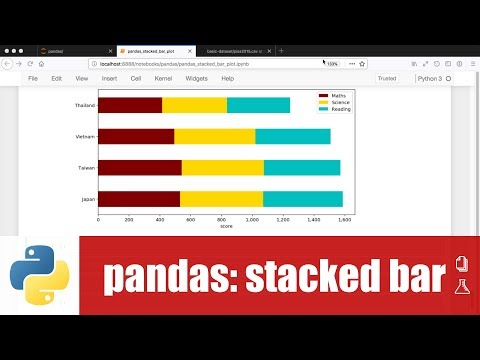

In [2]:
#เรียนรู้ Pandas bar stacked
from IPython.display import IFrame, YouTubeVideo, SVG, HTML
YouTubeVideo('26Nmks3vctU', 400,300)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')

pandas version: 0.23.0


In [3]:
pd.set_option('display.max_rows', 10)

### PISA score from Wikipedia
https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015.csv')
df

,Country,Maths,Science,Reading
0,Singapore,564,556,535
1,Hong Kong,548,523,527
2,Macau,544,529,509
3,Taiwan,542,532,497
4,Japan,532,538,516
...,...,...,...,...
65,Macedonia,371,384,352
66,Tunisia,367,386,361
67,Kosovo,362,378,347
68,Algeria,360,376,350


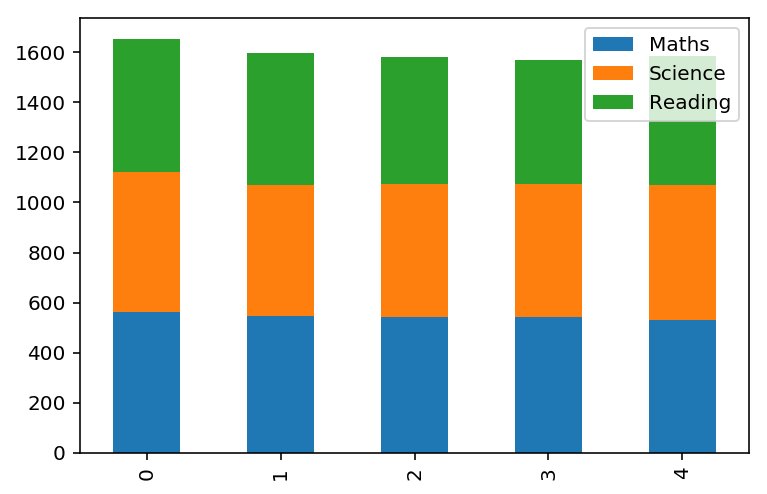

In [5]:
df[:5].plot(kind='bar', stacked=True);

In [6]:
df.set_index('Country', inplace=True)

In [7]:
df

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


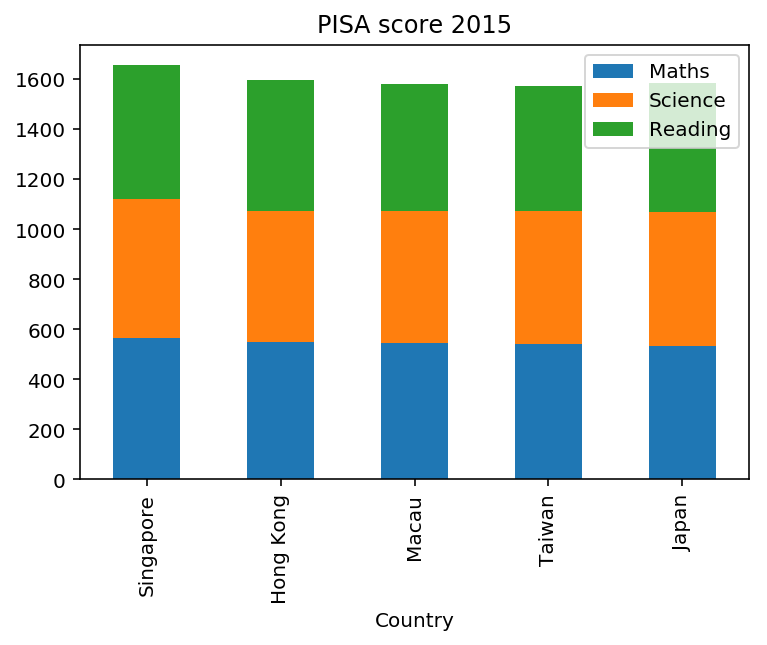

In [8]:
df[:5].plot(kind='bar', stacked=True, title='PISA score 2015');

In [9]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015.csv',
               index_col='Country')
df

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


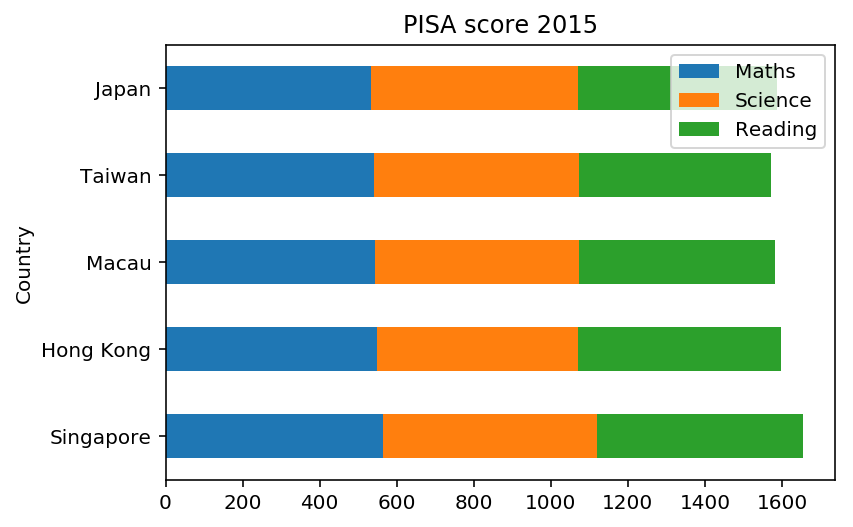

In [10]:
df[:5].plot(kind='barh', stacked=True, title='PISA score 2015');

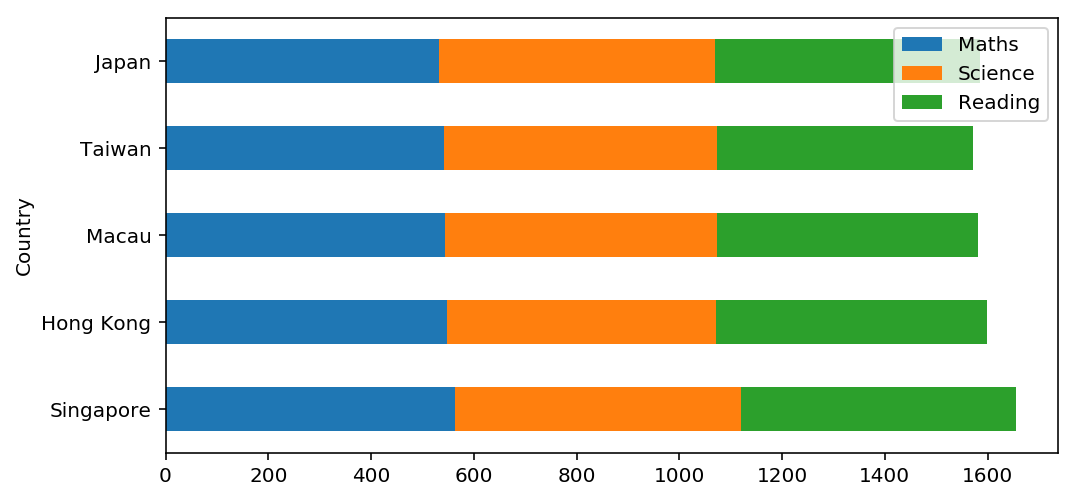

In [11]:
df[:5].plot(kind='barh', stacked=True, figsize=(8, 4));

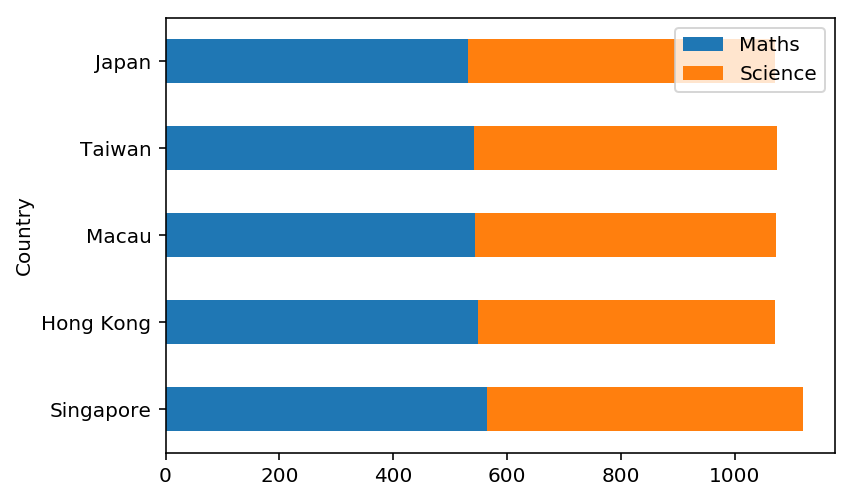

In [12]:
df[:5][['Maths', 'Science']].plot(kind='barh', stacked=True);

https://matplotlib.org/2.0.0/examples/color/named_colors.html

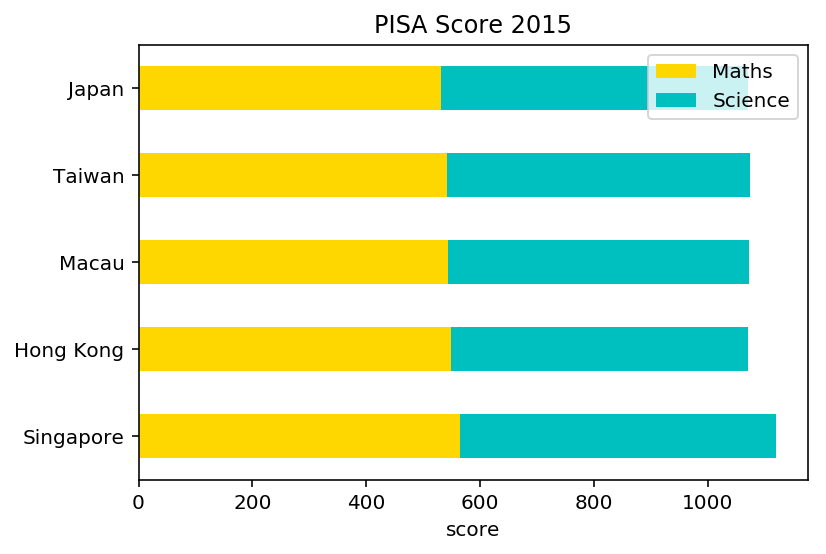

In [13]:
ax=df[:5][['Maths', 'Science']].plot(kind='barh', stacked=True, color=['gold', 'c'],
                                    title='PISA Score 2015');
ax.set_xlabel('score')
ax.set_ylabel('');

In [14]:
df['Total'] = df.Maths + df.Science + df.Reading
df

,Maths,Science,Reading,Total
Country,,,,
Singapore,564,556,535,1655
Hong Kong,548,523,527,1598
Macau,544,529,509,1582
Taiwan,542,532,497,1571
Japan,532,538,516,1586
...,...,...,...,...
Macedonia,371,384,352,1107
Tunisia,367,386,361,1114
Kosovo,362,378,347,1087


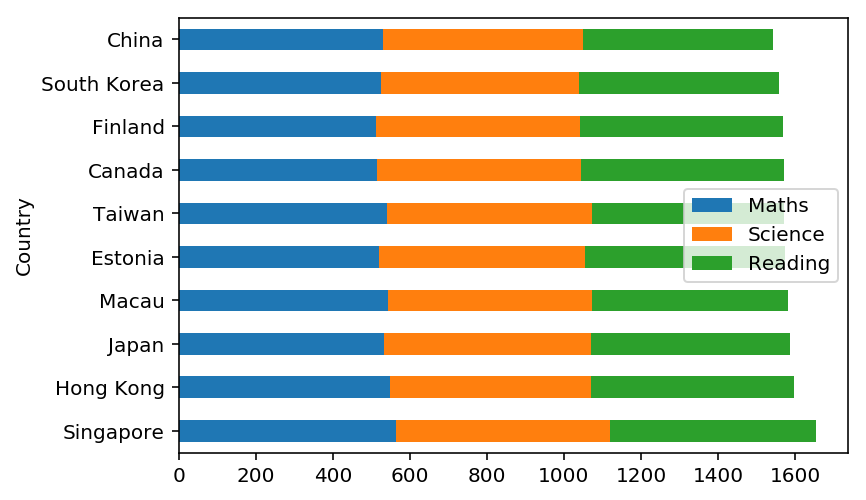

In [15]:
df.nlargest(10, 'Total')[['Maths', 'Science', 'Reading']].plot(kind='barh', stacked=True)

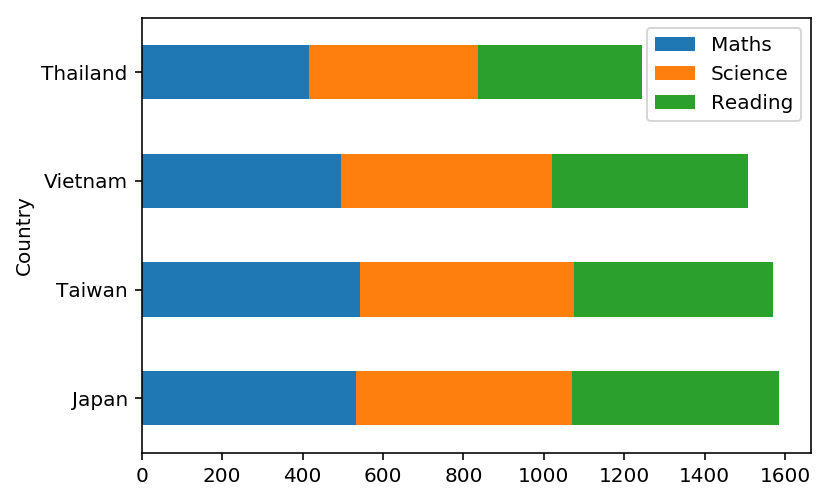

In [16]:
df.loc[['Japan', 'Taiwan', 'Vietnam', 'Thailand'], 
       ['Maths', 'Science', 'Reading']].plot(kind='barh', stacked=True)

## การกำหนดรูปแบบการแสดงตัวเลขในแกน เช่น มีการคั่นด้วย , ในเลขหลักพัน

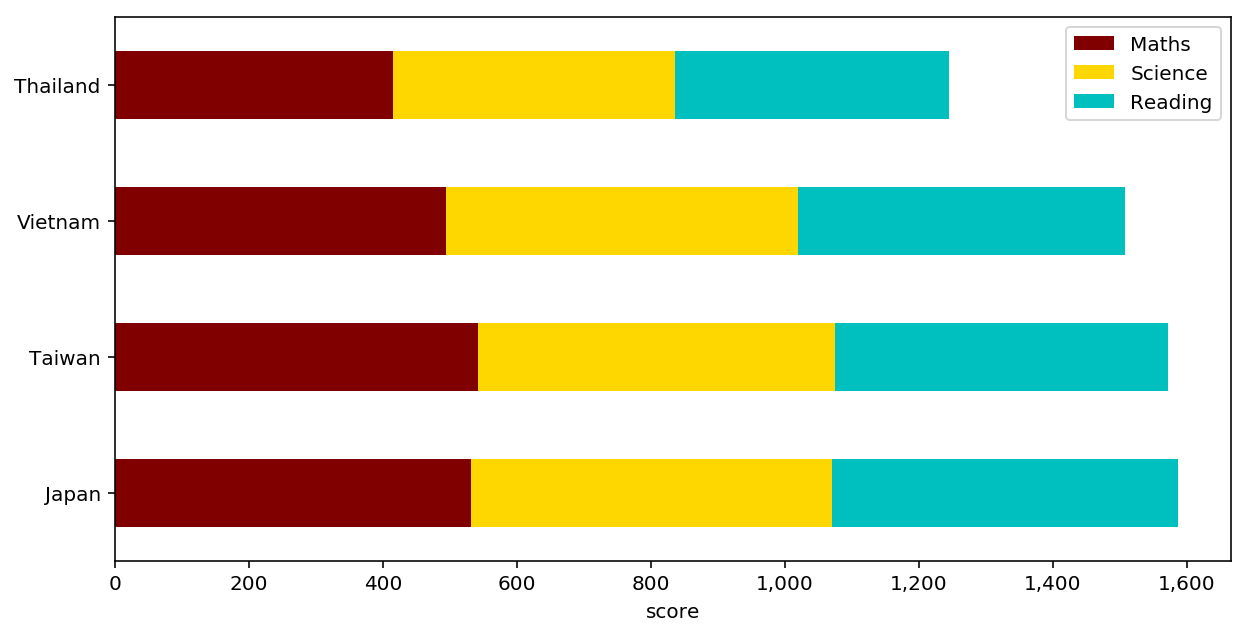

In [17]:
ax=df.loc[['Japan', 'Taiwan', 'Vietnam', 'Thailand'], 
          ['Maths', 'Science', 'Reading']].plot(kind='barh', stacked=True,
                                                color=['maroon', 'gold', 'c'],
                                                figsize=(10,5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)))
ax.set_xlabel('score')
ax.set_ylabel('');